In [1]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [6]:
df=pd.read_csv('D:\Analiz\data.csv') #
df2=pd.read_csv('D:\Analiz\datausa.csv')
df.sample(5) #

,Unnamed: 0,full_name,speciality,level,area,salary,employer,schedule,remote,skills,date,python,sql,pytorch,apache,git,java
225,225,Senior Data Scientist (Promo forecast),data scientist,senior,Москва,0,other,1,1,"['Учёный по данным', 'Старший (Senior)', 'Pyth...",2022-12-19,1,0,1,1,0,0
167,167,Data Engineer,data engineer,senior,Санкт-Петербург,0,Aston (ex. Andersen),1,1,"['Инженер по данным', 'Старший (Senior)', 'Mon...",2022-12-22,0,0,1,0,0,0
98,98,Middle data scientist,data scientist,middle,Москва,0,other,1,0,"{'requirement': 'Мы работаем на результат, а н...",2022-11-25,0,0,1,0,0,0
92,92,Intern Data Scientist,data scientist,intern,Москва,0,СБЕР,1,0,{'requirement': 'Опыт проведения / участия в И...,2022-12-14,1,1,1,0,0,0
217,217,Senior Data / ML Engineer (Персонализация),data engineer,senior,Москва,0,Sportmaster Lab,1,1,"['Инженер по данным', 'Старший (Senior)', 'Pyt...",2022-12-20,1,1,1,0,0,0


In [4]:
df.info() # информация о столбцах таблицы и типах


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  227 non-null    int64 
 1   full_name   227 non-null    object
 2   speciality  227 non-null    object
 3   level       227 non-null    object
 4   area        227 non-null    object
 5   salary      227 non-null    int64 
 6   employer    227 non-null    object
 7   schedule    227 non-null    int64 
 8   remote      227 non-null    int64 
 9   skills      227 non-null    object
 10  date        227 non-null    object
 11  python      227 non-null    int64 
 12  sql         227 non-null    int64 
 13  pytorch     227 non-null    int64 
 14  apache      227 non-null    int64 
 15  git         227 non-null    int64 
 16  java        227 non-null    int64 
dtypes: int64(10), object(7)
memory usage: 30.3+ KB


In [5]:
df.describe() # статистики по столбцам с количественными переменными, который показывает нам отношение навыков к общему кол-ву вакансий


,Unnamed: 0,salary,schedule,remote,python,sql,pytorch,apache,git,java
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.0,227.000000,227.000000,227.000000
mean,113.000000,0.140969,0.925110,0.392070,0.559471,0.471366,1.0,0.207048,0.048458,0.066079
std,65.673435,0.348759,0.263795,0.489291,0.497548,0.500283,0.0,0.406086,0.215207,0.248970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,56.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,113.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
75%,169.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000
max,226.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


Первичный аланиз показывает что на територии РФ 92% вакансий fulltime за рубежом этот процент стремится к 100%
Удалённая работа в РФ 39% 
Python является самым востребованным я/п как на територии РФ 56% вакансий требует занания Python в то же время на рынке вакансий за рубежом более востребованное знание SQl 61% далее Python 60%
Java является самым не популярным языком в вакансиях на територии рф 6,6%
apache является самым не популярным языком в вакансиях за рубежом 4,6%

In [8]:
df2.describe() 

,Unnamed: 0,schedule,salary,python,sql,apache,java
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,366.500000,0.997275,0.032698,0.604905,0.619891,0.046322,0.148501
std,212.031837,0.052164,0.177965,0.489205,0.485744,0.210324,0.355839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,366.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,549.750000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,733.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:

df.columns

Index(['Unnamed: 0', 'full_name', 'speciality', 'level', 'area', 'salary',
       'employer', 'schedule', 'remote', 'skills', 'date', 'python', 'sql',
       'pytorch', 'apache', 'git', 'java'],
      dtype='object')

In [40]:
col=['schedule','remote','python','sql','apache', 'git', 'java'] # берём колонки график работы, удалёнку и все языки программирования
col2=['schedule','python','sql','apache','java']



In [41]:
pd.options.mode.chained_assignment = None 
df[col].fillna(0, inplace=True) # заменим пропуски данных нулями, в противном случае выдаст ошибку
df2[col2].fillna(0, inplace=True) # заменим пропуски данных нулями, в противном случае выдаст ошибку

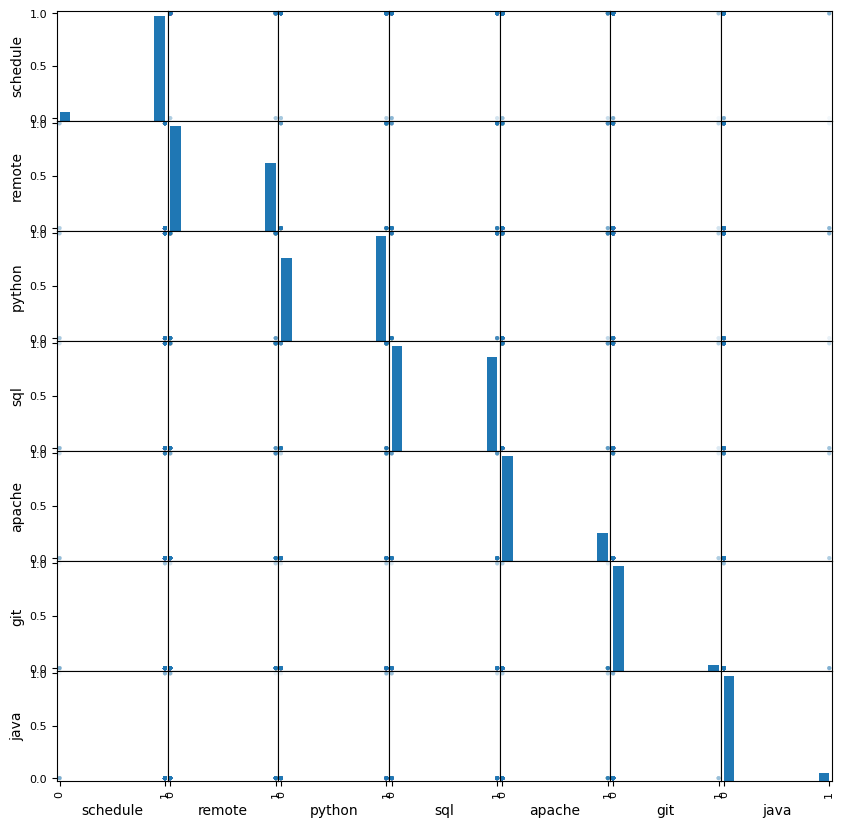

In [42]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));

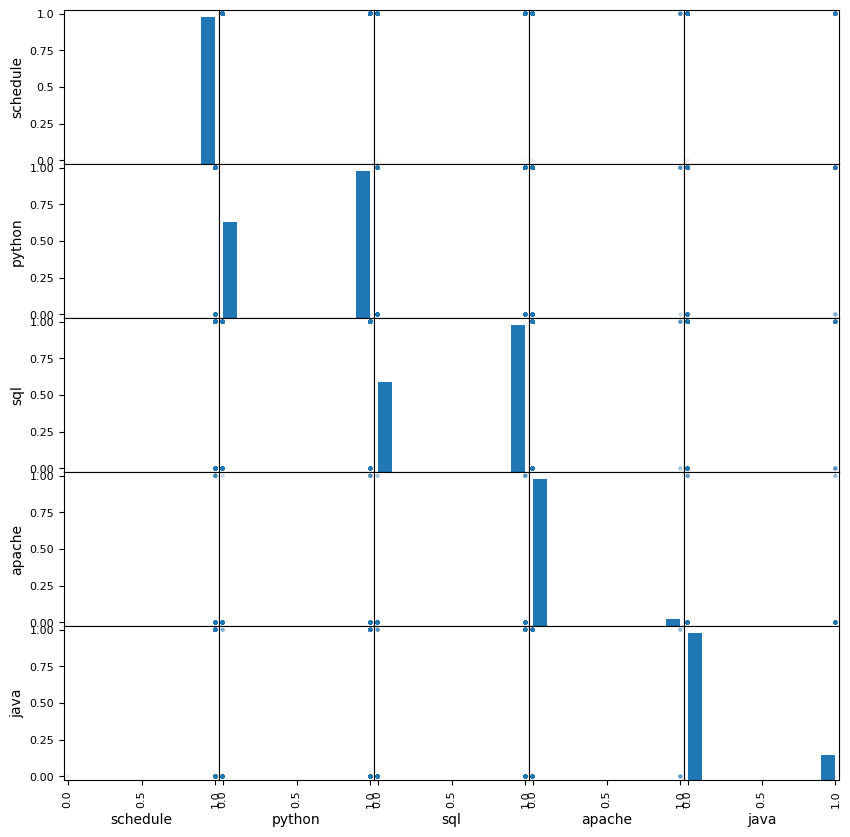

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2[col2], alpha=0.05, figsize=(10, 10));

In [44]:
df[col].corr() # посмотрим на парные корреляции

,schedule,remote,python,sql,apache,git,java
schedule,1.000000,-0.080040,0.050940,0.134556,-0.061139,-0.013734,0.008310
remote,-0.080040,1.000000,0.312749,0.362401,0.279985,0.112920,-0.140970
python,0.050940,0.312749,1.000000,0.286848,0.322032,0.076276,0.164595
sql,0.134556,0.362401,0.286848,1.000000,0.061982,0.115690,-0.073553
apache,-0.061139,0.279985,0.322032,0.061982,1.000000,0.036579,0.170433
git,-0.013734,0.112920,0.076276,0.115690,0.036579,1.000000,-0.060027
java,0.008310,-0.140970,0.164595,-0.073553,0.170433,-0.060027,1.000000


In [45]:
df2[col2].corr() # посмотрим на парные корреляции

,schedule,python,sql,apache,java
schedule,1.000000,0.011217,0.012910,0.011520,0.021829
python,0.011217,1.000000,0.360362,0.111818,0.219950
sql,0.012910,0.360362,1.000000,0.052396,0.129695
apache,0.011520,0.111818,0.052396,1.000000,0.126706
java,0.021829,0.219950,0.129695,0.126706,1.000000


Отсюда мы видим что git apache более всего востребованны на удалёнке в РФ
Также самая популярная связка навыков в РФ python apache, за рубежом это связка python sql
Отсюда мы можем сделать вывод что на територии РФ более популярна работа с веб-серверми в то время как за рубежём более востребованны професси по работе с данными